<a href="https://colab.research.google.com/github/ddesai-sjsu/Data-Mining/blob/main/Frequent_pattern_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A colab to demonstrate frequent pattern mining apriori and fpgrowth**

## **Apriori Algorithm**
Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. It is devised to operate on a database containing a lot of transactions, for instance, items brought by customers in a store.Association rule learning is a prominent and a well-explored method for determining relations among variables in large databases.

### **Import Libraries**

In [ ]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import squarify
import matplotlib

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### **Download data & import dataframe**

In [3]:
!gdown --id 1iJhlZysD3SXHJCR0ZVBnVio-hpk1__62

Downloading...
From: https://drive.google.com/uc?id=1iJhlZysD3SXHJCR0ZVBnVio-hpk1__62
To: /content/Groceries_dataset.csv
100% 1.10M/1.10M [00:00<00:00, 35.2MB/s]


In [4]:
df = pd.read_csv('/content/Groceries_dataset.csv')

In [ ]:
data=df

In [ ]:
df.shape

(38765, 3)

In [23]:
df.head


<bound method NDFrame.head of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

### **Data preprocessing**

In [6]:
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(df.groupby(['Member_number', 'Date']))]

In [7]:
# The following instructions transform the dataset into the required format 
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

In [8]:
trans_encoder_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### **Data Visualization**

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'whole milk'),
 Text(0, 0, 'other vegetables'),
 Text(0, 0, 'rolls/buns'),
 Text(0, 0, 'soda'),
 Text(0, 0, 'yogurt'),
 Text(0, 0, 'root vegetables'),
 Text(0, 0, 'tropical fruit'),
 Text(0, 0, 'bottled water'),
 Text(0, 0, 'sausage'),
 Text(0, 0, 'citrus fruit'),
 Text(0, 0, 'pastry'),
 Text(0, 0, 'pip fruit'),
 Text(0, 0, 'shopping bags'),
 Text(0, 0, 'canned beer'),
 Text(0, 0, 'bottled beer'),
 Text(0, 0, 'whipped/sour cream'),
 Text(0, 0, 'newspapers'),
 Text(0, 0, 'frankfurter'),
 Text(0, 0, 'brown bread'),
 Text(0, 0, 'domestic eggs')]

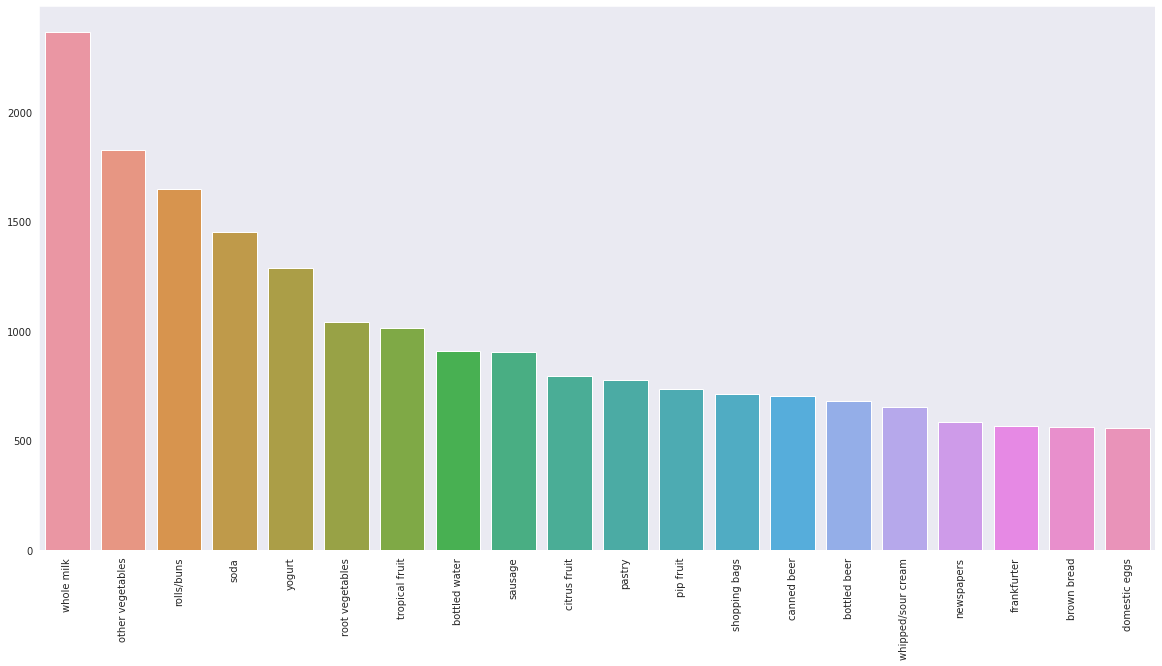

In [9]:
r=trans_encoder_matrix.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Tree map of top 20 items')

(0.0, 100.0, 0.0, 100.0)

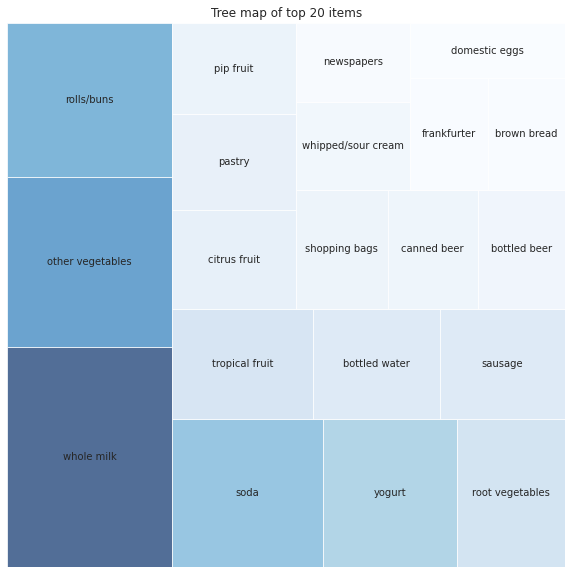

In [10]:
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

### **Apriori Mining**

In [11]:
#let us return items and ietmsets with atleast 5% support:
freq_items=apriori(trans_encoder_matrix,min_support=0.05,use_colnames=True)

In [12]:
freq_items.head()

,support,itemsets
0,0.060683,(bottled water)
1,0.053131,(citrus fruit)
2,0.122101,(other vegetables)
3,0.051728,(pastry)
4,0.110005,(rolls/buns)


This tell us that there are 5 frequent itemsets of different lengths

**Generating Association rules**

In [13]:
res=association_rules(freq_items,metric="lift")

## **FP Growth**

This algorithm is an improvement to the Apriori method. A frequent pattern is generated without the need for candidate generation. FP growth algorithm represents the database in the form of a tree called a frequent pattern tree or FP tree.

This tree structure will maintain the association between the itemsets. The database is fragmented using one frequent item. This fragmented part is called “pattern fragment”. The itemsets of these fragmented patterns are analyzed. Thus with this method, the search for frequent itemsets is reduced comparatively.

In [15]:
!pip uninstall mlxtend
!pip install git+git://github.com/rasbt/mlxtend.git

Found existing installation: mlxtend 0.20.0.dev0
Uninstalling mlxtend-0.20.0.dev0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/mlxtend-0.20.0.dev0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/mlxtend/*
Proceed (y/n)? y
  Successfully uninstalled mlxtend-0.20.0.dev0
  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-w08cwisf
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-w08cwisf
  Created wheel for mlxtend: filename=mlxtend-0.20.0.dev0-py2.py3-none-any.whl size=1585378 sha256=c32c42798a3ed9bacec00f852893277bebb265ed04d30eb7741b506756ea8446
  Stored in directory: /tmp/pip-ephem-wheel-cache-ht448xeu/wheels/8c/d2/39/72837b351435c21adf9296330ca3783d4be80aec9dae8387d1
Successfully built mlxtend


In [ ]:
# %pip install mlxtend --upgrade

In [17]:
from mlxtend.frequent_patterns import fpgrowth

In [18]:
result=fpgrowth(trans_encoder_matrix,min_support=0.05,use_colnames=True)

In [19]:
result

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.051728,(pastry)
4,0.097106,(soda)
5,0.110005,(rolls/buns)
6,0.122101,(other vegetables)
7,0.067767,(tropical fruit)
8,0.069572,(root vegetables)
9,0.060683,(bottled water)


In [21]:
res=association_rules(result,metric="lift",min_threshold=1)